<a href="https://colab.research.google.com/github/sagnikbiswas/My_Keras_Notebooks/blob/main/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a regression model with Keras

This is an exercise as part of the Deep Learning Fundamentals with Keras course by IBM that I am undertaking.

We will be building and training a regression model using Keras Sequential model to predict the compressive strengths of different samples of cocrete based on their ingredients.

The data can be found [here](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv)

###Importing necessary libraries

In [8]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

### Loading and processing the data in a pandas DataFrame

In [9]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

Cement  Blast Furnace Slag  Fly Ash  ...  Fine Aggregate  Age  Strength
0   540.0                 0.0      0.0  ...           676.0   28     79.99
1   540.0                 0.0      0.0  ...           676.0   28     61.89
2   332.5               142.5      0.0  ...           594.0  270     40.27
3   332.5               142.5      0.0  ...           594.0  365     41.05
4   198.6               132.4      0.0  ...           825.5  360     44.30

[5 rows x 9 columns]

In [10]:
concrete_data.shape

(1030, 9)

In [11]:
concrete_data.describe()

Cement  Blast Furnace Slag  ...          Age     Strength
count  1030.000000         1030.000000  ...  1030.000000  1030.000000
mean    281.167864           73.895825  ...    45.662136    35.817961
std     104.506364           86.279342  ...    63.169912    16.705742
min     102.000000            0.000000  ...     1.000000     2.330000
25%     192.375000            0.000000  ...     7.000000    23.710000
50%     272.900000           22.000000  ...    28.000000    34.445000
75%     350.000000          142.950000  ...    56.000000    46.135000
max     540.000000          359.400000  ...   365.000000    82.600000

[8 rows x 9 columns]

In [12]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The DataFrame has 9 columns and 1030 samples. There are no null values and no further cleaning of the data is required.

We will split the samples into training and testing samples, instead of using `validation_split`, to easily plot the test data results.

In [28]:
split_ratio = 0.8    #train_sample:test_sample = 8:2
concrete_data_train = concrete_data.sample(int(len(concrete_data)*split_ratio))
concrete_data_test = concrete_data[~concrete_data.index.isin(concrete_data_train.index)]

concrete_data_train.reset_index(inplace=True, drop=True)
concrete_data_test.reset_index(inplace=True, drop = True)

The first 8 columns are the predictors and the last column "Strength" is the target.

In [29]:
concrete_data_columns = concrete_data.columns

predictors_train = concrete_data_train[concrete_data_columns[concrete_data_columns != 'Strength']]
target_train = concrete_data_train['Strength']

predictors_test = concrete_data_test[concrete_data_columns[concrete_data_columns != 'Strength']]
target_test = concrete_data_test['Strength']

In [30]:
# normalize predictors_train
predictors_train_norm = (predictors_train - predictors_train.mean()) / predictors_train.std()
predictors_train_norm.head()

Cement  Blast Furnace Slag  ...  Fine Aggregate       Age
0 -0.849984            2.591756  ...       -0.879209 -0.284348
1  1.839699            0.572401  ...        0.091140 -0.668778
2 -1.322948           -0.650522  ...       -0.820133 -0.284348
3  2.346105           -0.827245  ...       -0.681871 -0.284348
4  0.290862            1.063691  ...       -0.185385 -0.284348

[5 rows x 8 columns]

In [31]:
# store the number of columns in predictors
n_cols = predictors_train.shape[1]
n_cols

8

### Building our model

In [32]:
def my_regression_model():
    my_model = Sequential()
    my_model.add(Dense(50, activation='relu', input_shape=(n_cols,)))    #input layer
    my_model.add(Dense(50, activation='relu'))    #hidden layer 1
    my_model.add(Dense(1))    #hidden layer 2. The 1 denotes the number of outputs i.e. the next layer is the output layer
    
    my_model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mse"])    #metrics arg seems redundant here
    return my_model


### Training

In [57]:
my_model = my_regression_model()
my_model.fit(predictors_train_norm, target_train, epochs=100, verbose=1)

Epoch 1/100
824/824 [==============================] - 2s 1ms/step - loss: 746.8508 - mse: 746.8508
Epoch 2/100
824/824 [==============================] - 1s 1ms/step - loss: 149.1511 - mse: 149.1511
Epoch 3/100
824/824 [==============================] - 1s 1ms/step - loss: 137.8145 - mse: 137.8145
Epoch 4/100
824/824 [==============================] - 1s 1ms/step - loss: 136.8361 - mse: 136.8361
Epoch 5/100
824/824 [==============================] - 1s 1ms/step - loss: 105.8064 - mse: 105.8064
Epoch 6/100
824/824 [==============================] - 1s 1ms/step - loss: 90.9090 - mse: 90.9090
Epoch 7/100
824/824 [==============================] - 1s 1ms/step - loss: 85.3806 - mse: 85.3806
Epoch 8/100
824/824 [==============================] - 1s 1ms/step - loss: 71.9151 - mse: 71.9151
Epoch 9/100
824/824 [==============================] - 1s 1ms/step - loss: 52.7959 - mse: 52.7959
Epoch 10/100
824/824 [==============================] - 1s 1ms/step - loss: 56.7135 - mse: 56.7135
Epoch 11/

###Testing

In [67]:
# first normalize testing data with the mean and std of training data
predictors_test_norm = (predictors_test - predictors_train.mean())/predictors_train.std()

# then predict the output
predicted_target_test = my_model.predict(predictors_test_norm)
predicted_target_test[:5]

array([[70.88357  ],
       [39.05434  ],
       [38.68691  ],
       [ 7.8373556],
       [52.518063 ]], dtype=float32)

In [68]:
# actual values
target_test[:5]

0    61.89
1    41.05
2    47.81
3     8.06
4    55.26
Name: Strength, dtype: float64

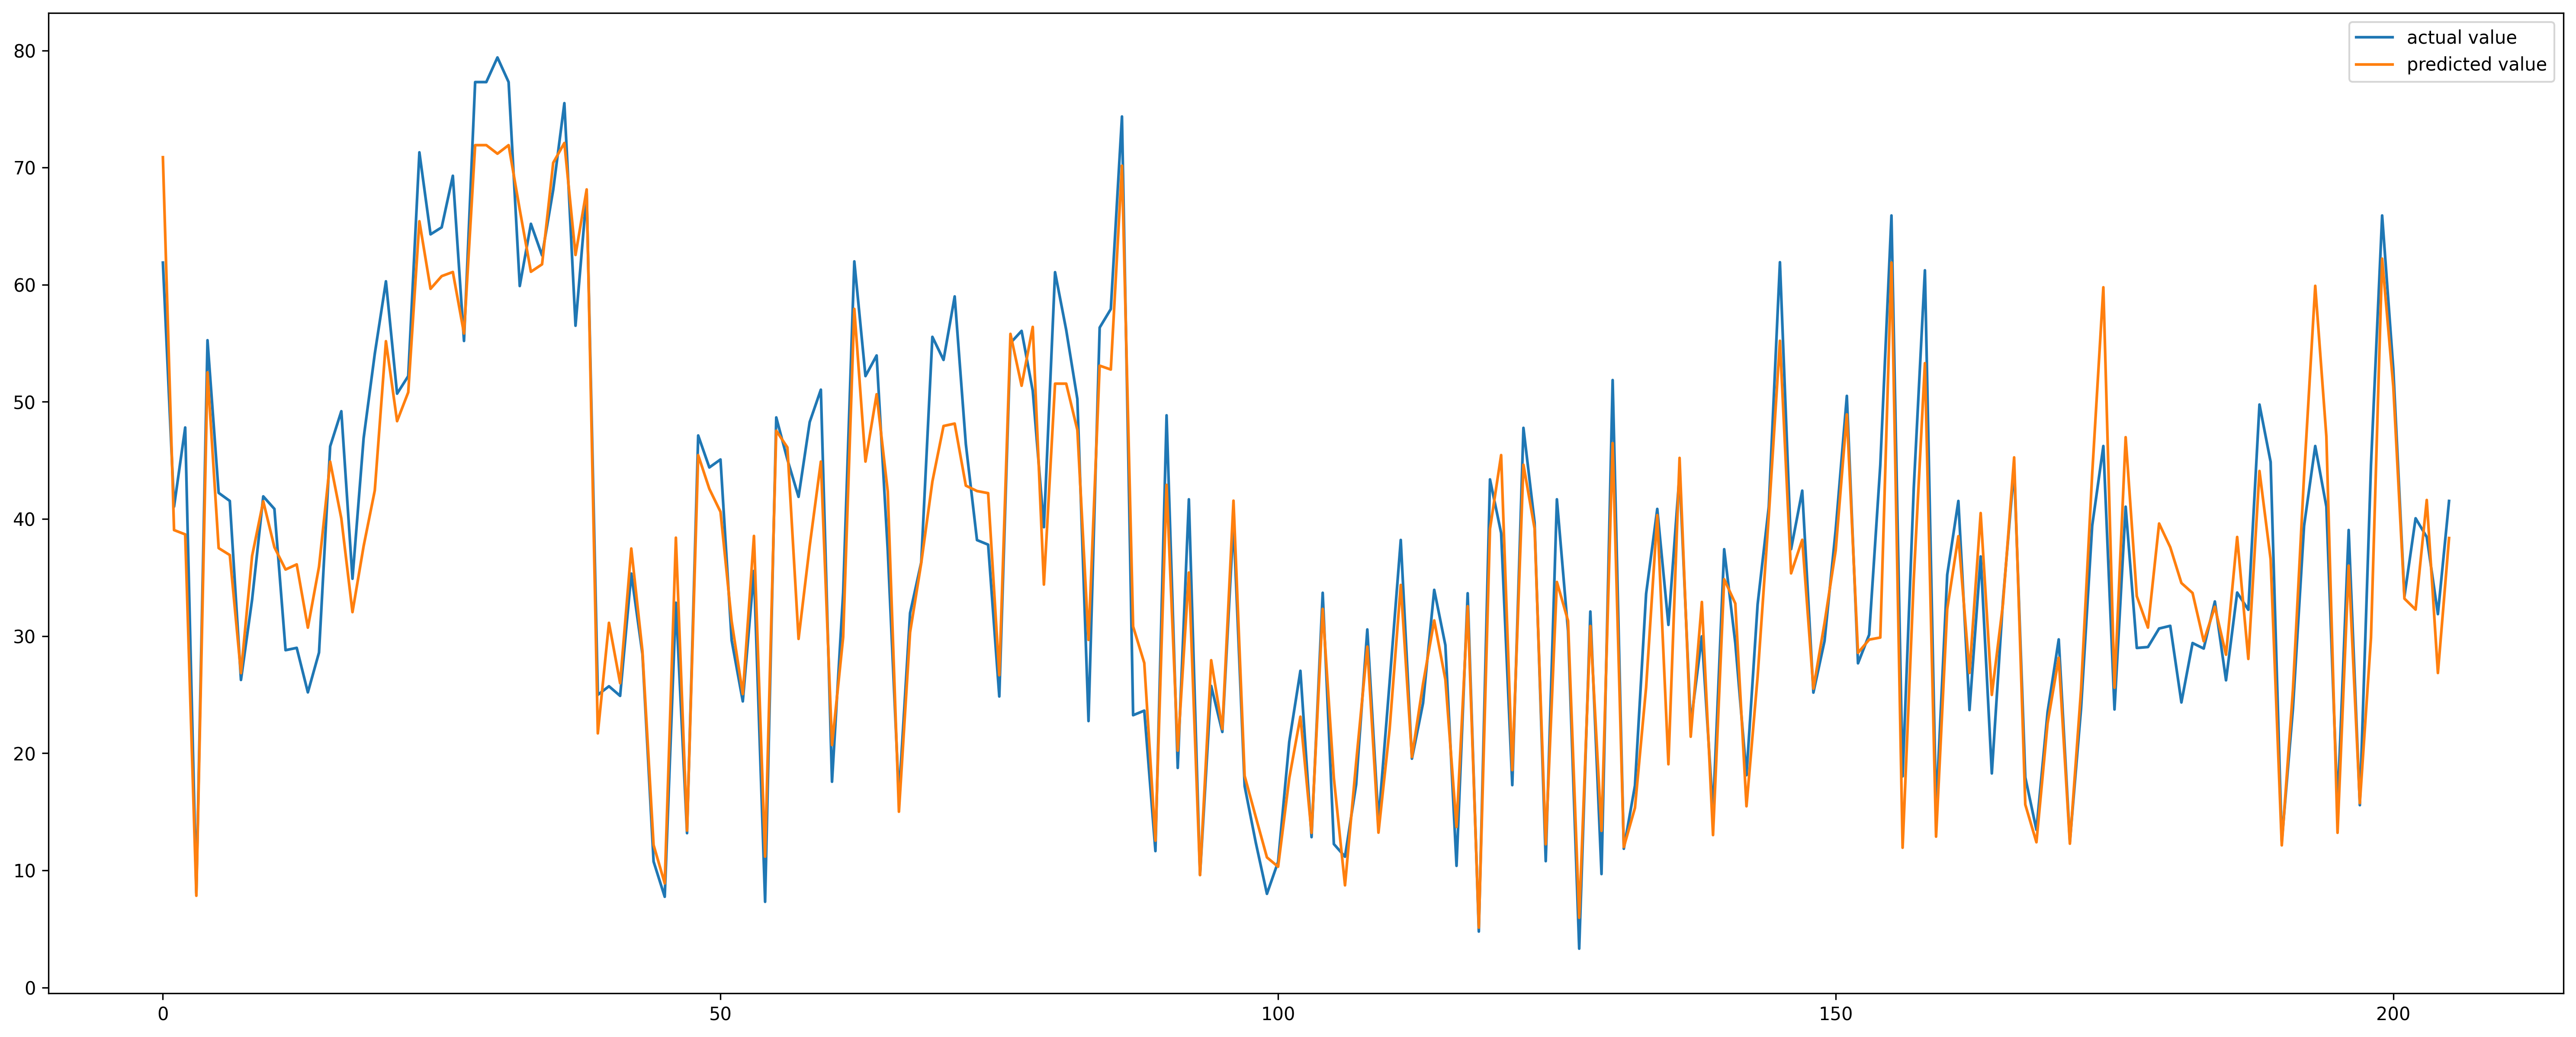

In [69]:
# plot it!
plt.figure(num=1, figsize=(25, 10), dpi=300)
plt.plot(target_test, label="actual value")
plt.plot(predicted_target_test, label = "predicted value")
plt.legend()
plt.show()

Not too shabby, but far from good.

#Rough Area

###Let's try without normalizing

In [82]:
my_model2 = my_regression_model()
my_model2.fit(predictors_train, target_train, epochs=100, verbose=0)

In [83]:
predicted2 = my_model2.predict(predictors_test)

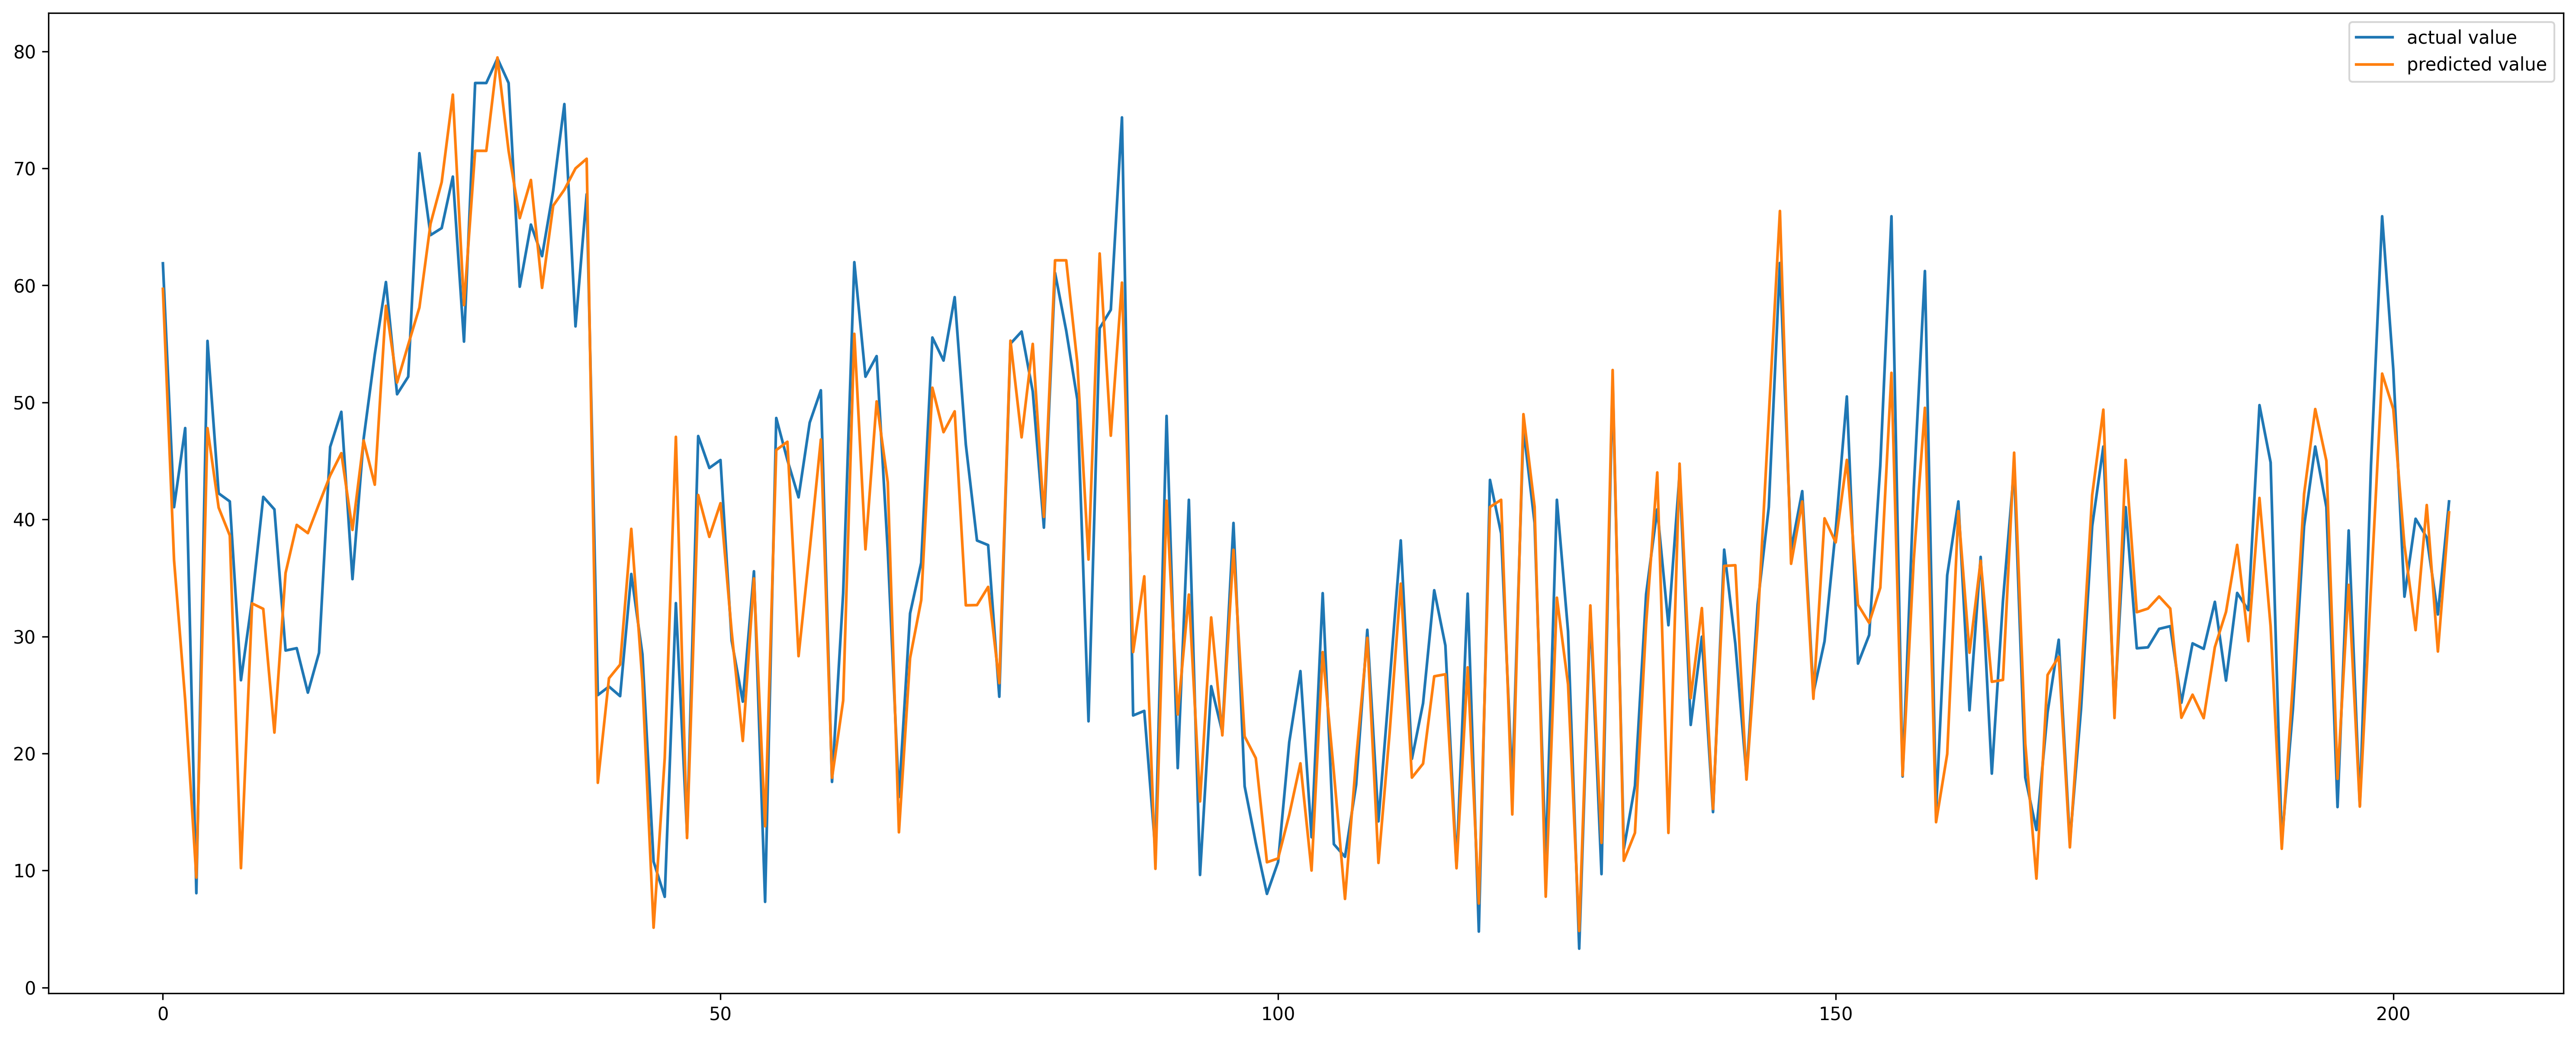

In [84]:
plt.figure(num=2, figsize=(25, 10), dpi=300)
plt.plot(target_test, label="actual value")
plt.plot(predicted2, label = "predicted value")
plt.legend()
plt.show()

###without normalizing and with smaller batch size

In [85]:
my_model3 = my_regression_model()
my_model3.fit(predictors_train, target_train, batch_size=4, epochs=100, verbose=0)

In [86]:
predicted3 = my_model3.predict(predictors_test)

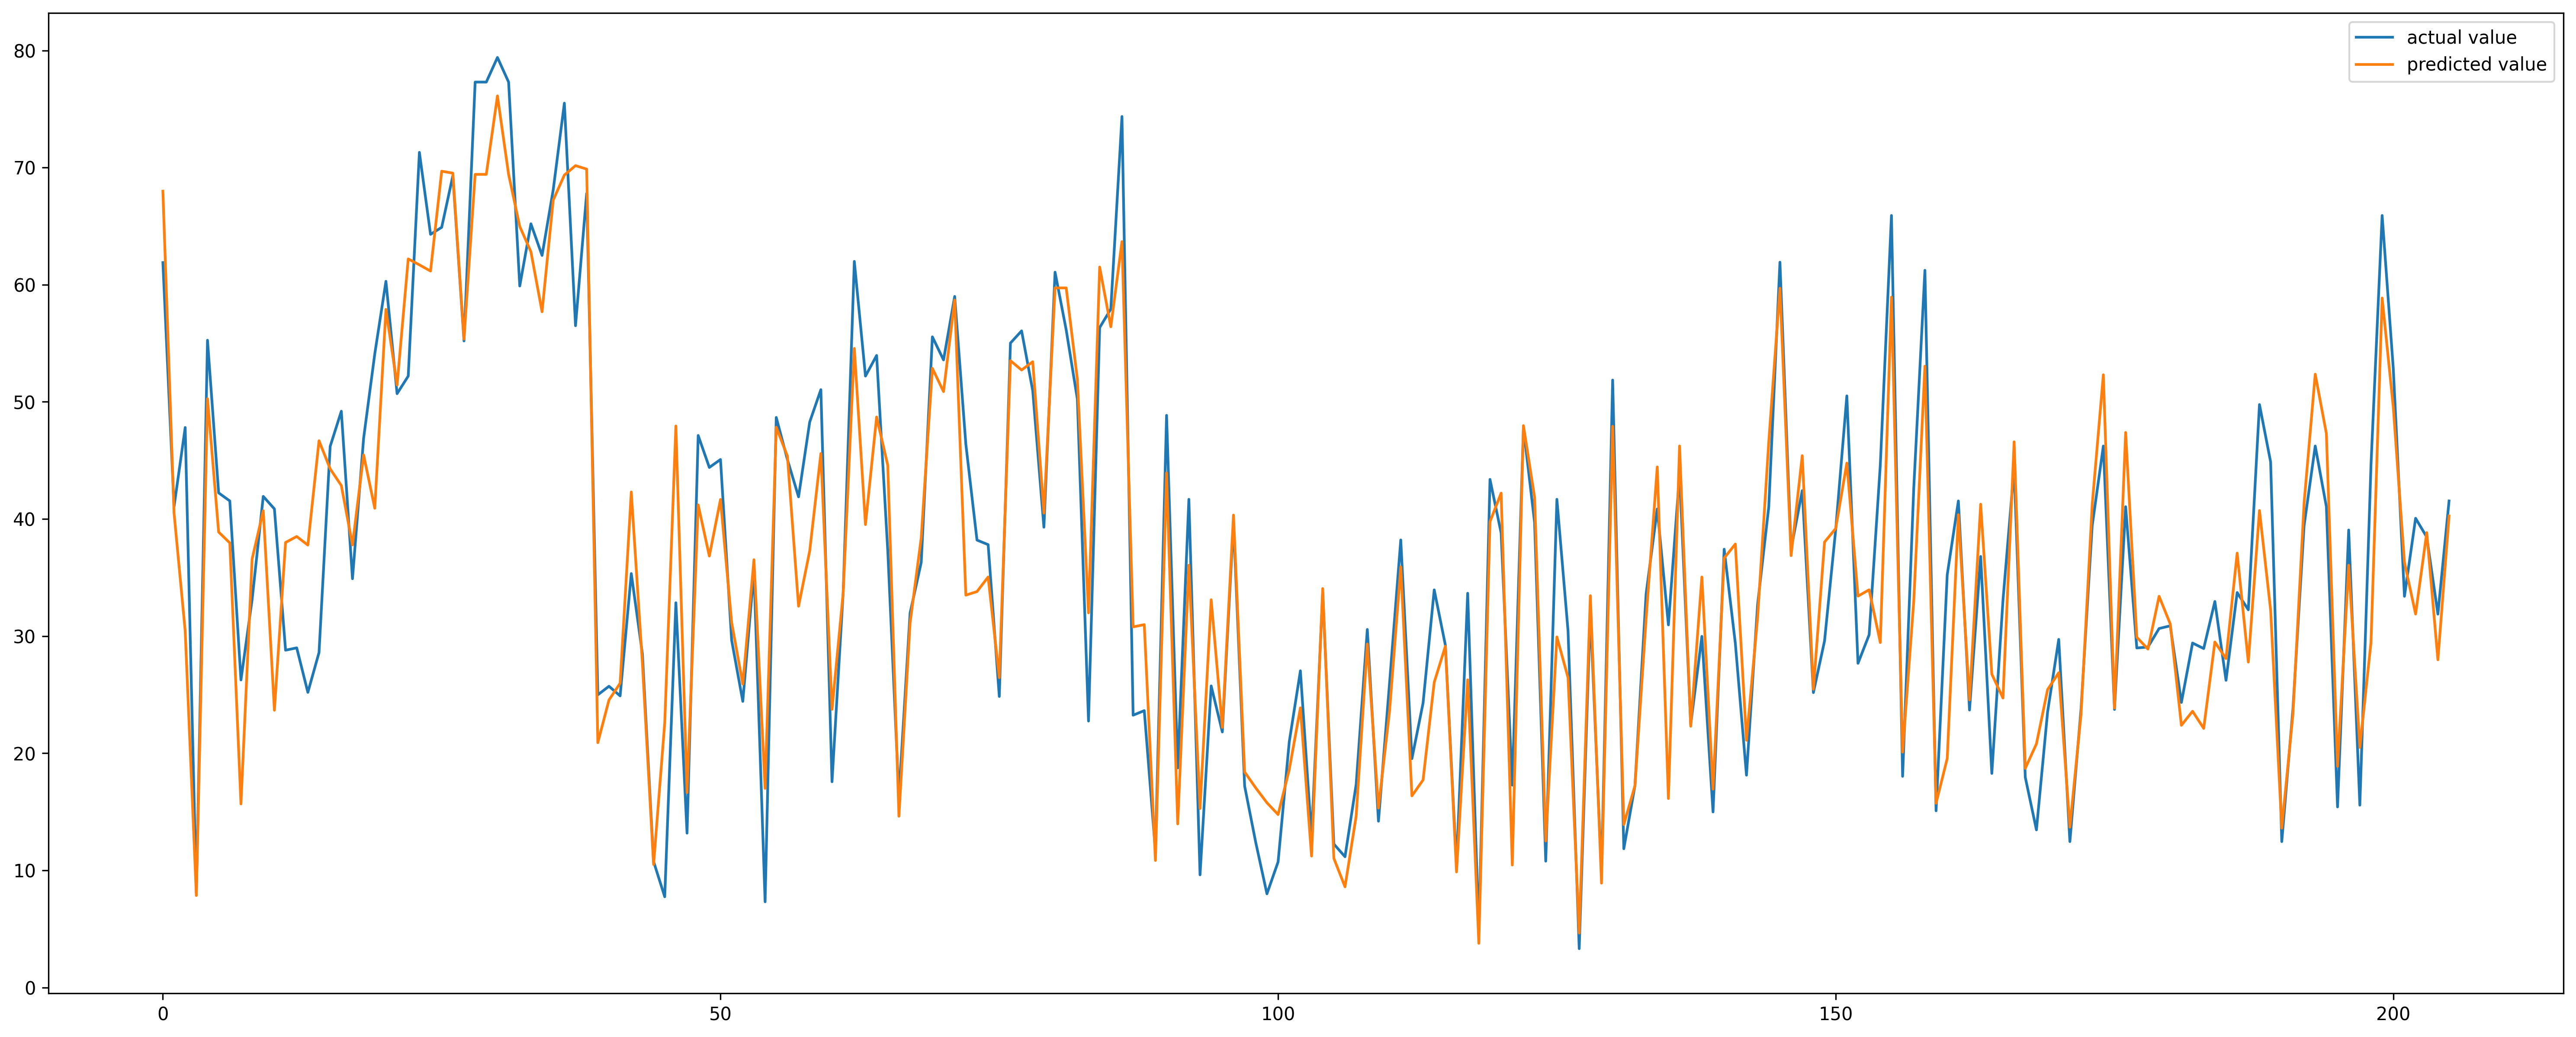

In [87]:
plt.figure(num=3, figsize=(25, 10), dpi=300)
plt.plot(target_test, label="actual value")
plt.plot(predicted3, label = "predicted value")
plt.legend()
plt.show()

###With normalizing, smallest batch size

In [98]:
my_model4 = my_regression_model()
my_model4.fit(predictors_train_norm, target_train, batch_size=1, epochs=100, verbose=2)

Epoch 1/100
824/824 - 1s - loss: 405.8239 - mse: 405.8239
Epoch 2/100
824/824 - 1s - loss: 149.1229 - mse: 149.1229
Epoch 3/100
824/824 - 1s - loss: 133.7226 - mse: 133.7226
Epoch 4/100
824/824 - 1s - loss: 125.6641 - mse: 125.6641
Epoch 5/100
824/824 - 1s - loss: 111.6157 - mse: 111.6157
Epoch 6/100
824/824 - 1s - loss: 90.2233 - mse: 90.2233
Epoch 7/100
824/824 - 1s - loss: 72.1901 - mse: 72.1901
Epoch 8/100
824/824 - 1s - loss: 59.8089 - mse: 59.8089
Epoch 9/100
824/824 - 1s - loss: 50.8709 - mse: 50.8709
Epoch 10/100
824/824 - 1s - loss: 47.1292 - mse: 47.1292
Epoch 11/100
824/824 - 1s - loss: 44.1504 - mse: 44.1504
Epoch 12/100
824/824 - 1s - loss: 41.2917 - mse: 41.2917
Epoch 13/100
824/824 - 1s - loss: 40.4779 - mse: 40.4779
Epoch 14/100
824/824 - 1s - loss: 38.4380 - mse: 38.4380
Epoch 15/100
824/824 - 1s - loss: 38.6540 - mse: 38.6540
Epoch 16/100
824/824 - 1s - loss: 36.3769 - mse: 36.3769
Epoch 17/100
824/824 - 1s - loss: 36.6105 - mse: 36.6105
Epoch 18/100
824/824 - 1s - lo

In [90]:
predicted4 = my_model4.predict(predictors_test_norm)

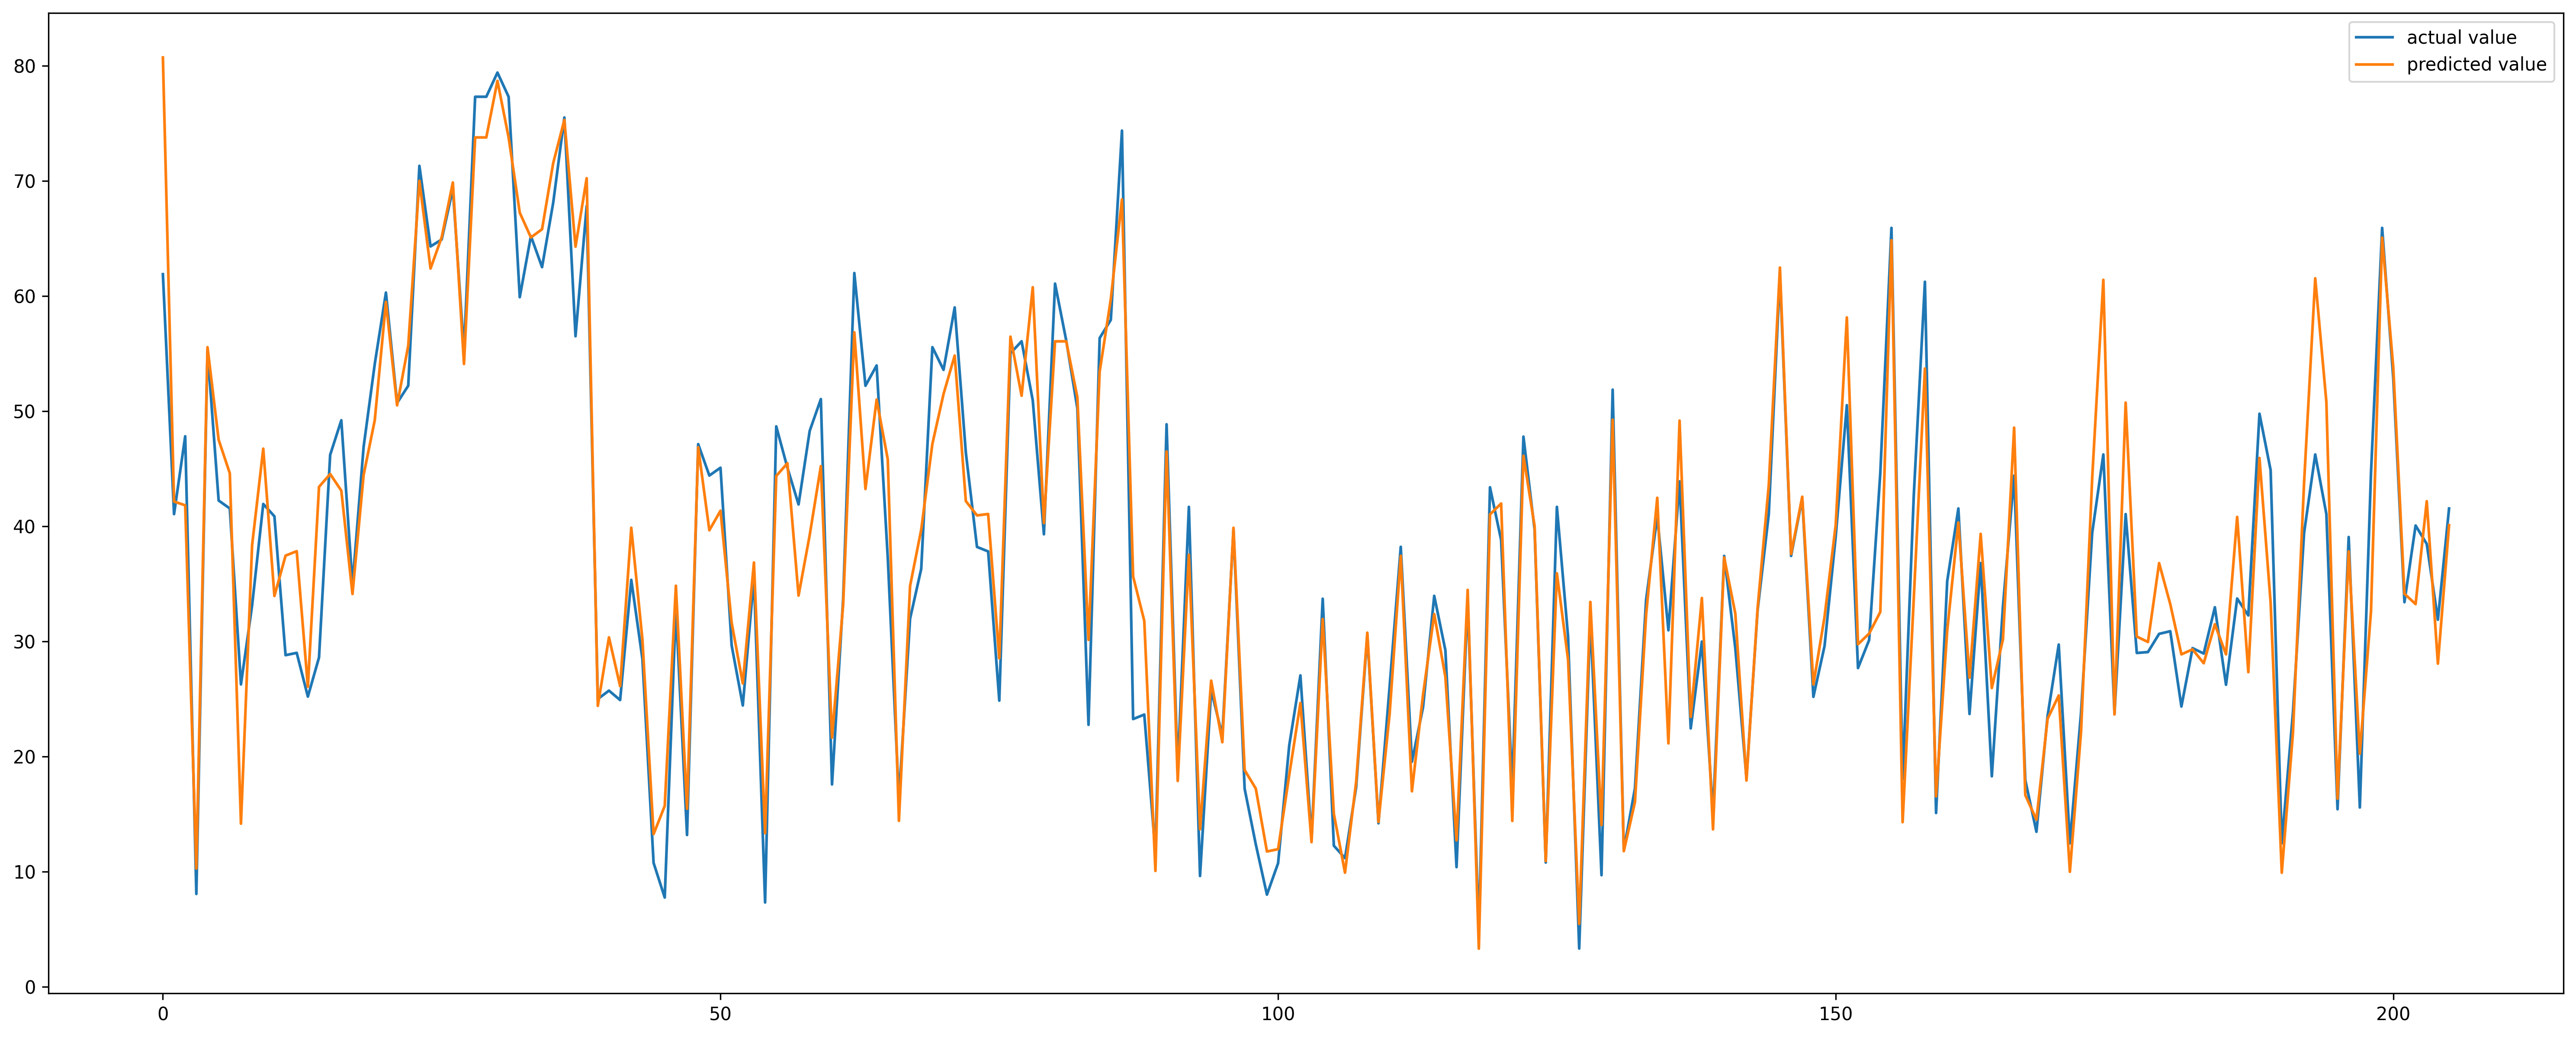

In [91]:
plt.figure(num=4, figsize=(25, 10), dpi=300)
plt.plot(target_test, label="actual value")
plt.plot(predicted4, label = "predicted value")
plt.legend()
plt.show()

###With normalizing, 1000 epochs

In [92]:
my_model5 = my_regression_model()
my_model5.fit(predictors_train_norm, target_train, epochs=1000, verbose=0)

In [93]:
predicted5 = my_model5.predict(predictors_test_norm)

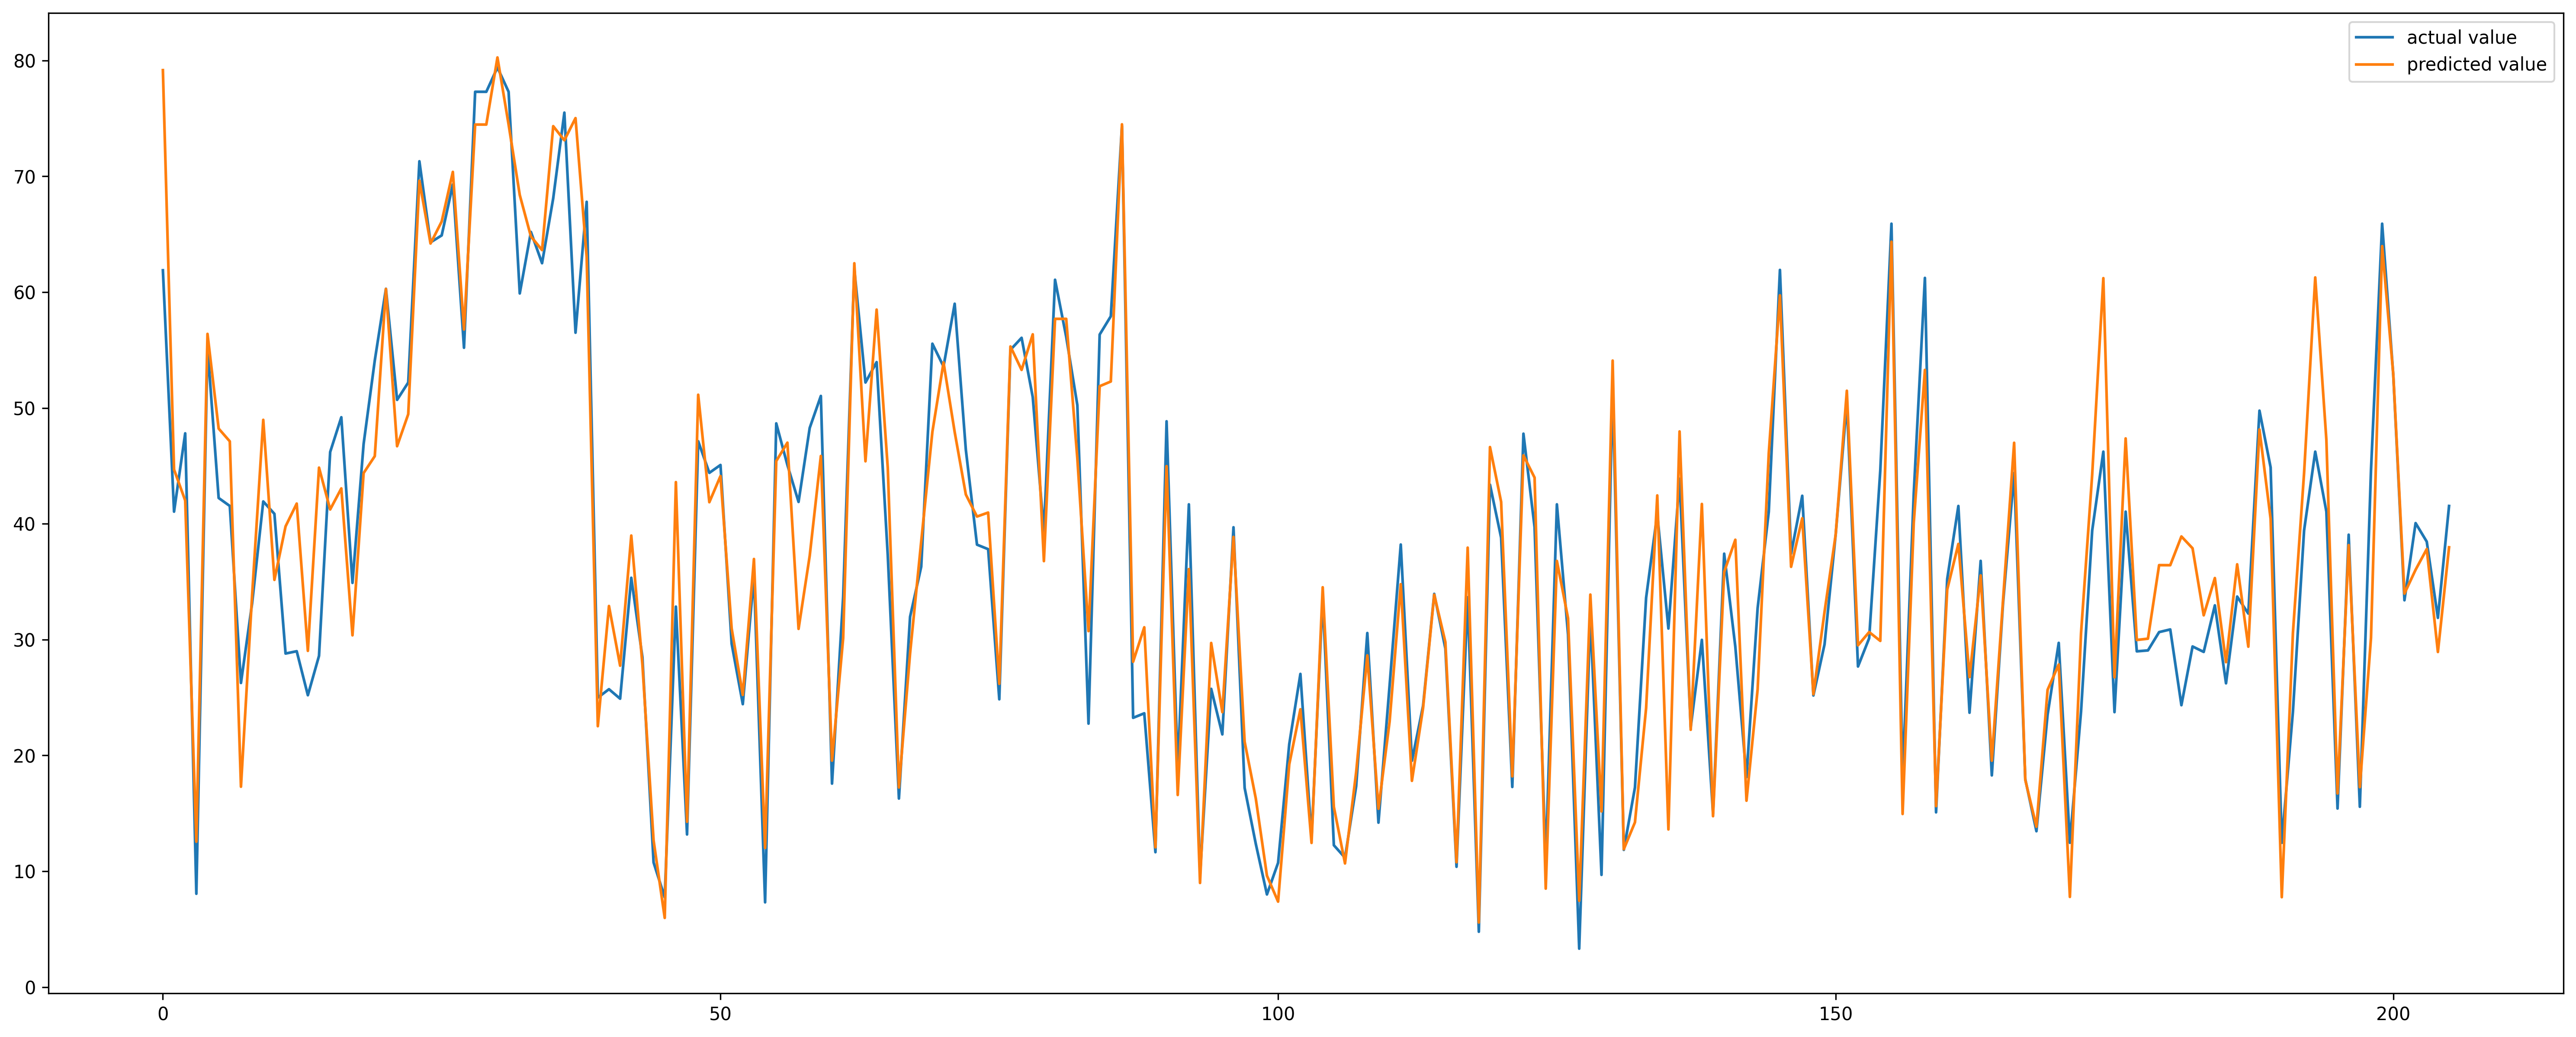

In [94]:
plt.figure(num=5, figsize=(25, 10), dpi=300)
plt.plot(target_test, label="actual value")
plt.plot(predicted5, label = "predicted value")
plt.legend()
plt.show()

###With normalizing, smalest batch_size, 1000 epochs

This took 15 minutes to execute

In [95]:
my_model6 = my_regression_model()
my_model6.fit(predictors_train_norm, target_train, batch_size=1, epochs=1000, verbose=0)

In [96]:
predicted6 = my_model6.predict(predictors_test_norm)

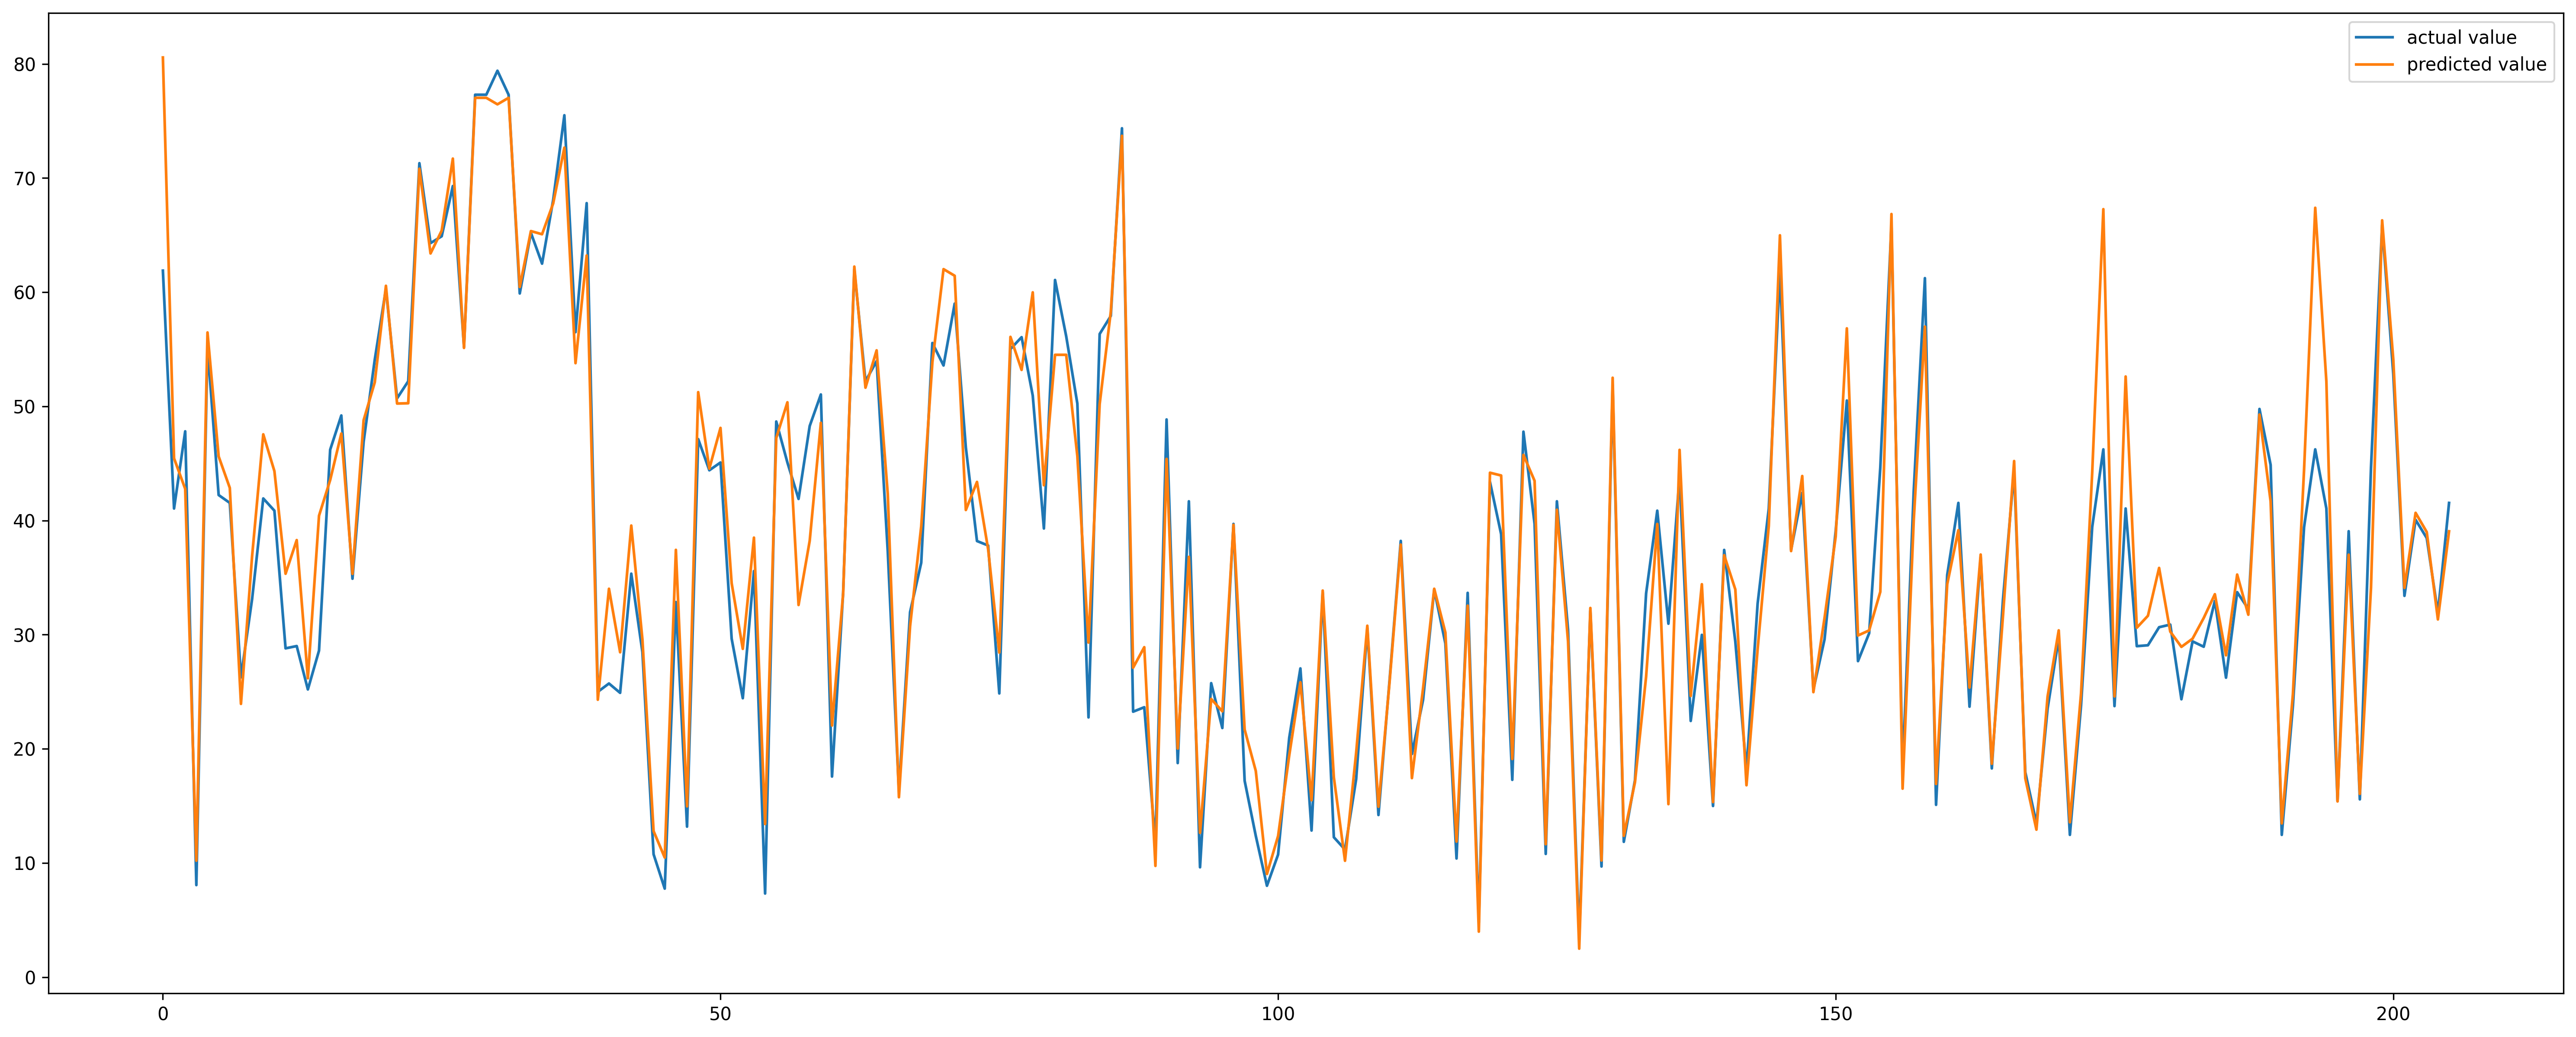

In [97]:
plt.figure(num=6, figsize=(25, 10), dpi=300)
plt.plot(target_test, label="actual value")
plt.plot(predicted6, label = "predicted value")
plt.legend()
plt.show()

mmmm nice